### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### Load Data

In [2]:
FILE_PATH = './data/sensor_data.csv'
df_data = pd.read_csv(FILE_PATH,
                      parse_dates=['SensorTime']).set_index('SensorTime')

display(df_data)

,Sensor0,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,...,Sensor581,Sensor582,Sensor583,Sensor584,Sensor585,Sensor586,Sensor587,Sensor588,Sensor589,Pass_Fail
SensorTime,,,,,,,,,,,,,,,,,,,,,
2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1


### Data Preprocessing

#### 결측치

##### 결측치 확인

In [3]:
nan_data = df_data.isnull().sum()
print(nan_data)

Sensor0       6
Sensor1       7
Sensor2      14
Sensor3      14
Sensor4      14
             ..
Sensor586     1
Sensor587     1
Sensor588     1
Sensor589     1
Pass_Fail     0
Length: 591, dtype: int64


##### 결측치 대체

In [4]:
df_data = df_data.fillna(df_data.mean())

#### 상관 관계

##### 상관계수 확인

In [5]:
correlation = df_data.corrwith(df_data['Pass_Fail'])
df_correlation = pd.DataFrame(abs(correlation))
df_correlation.columns = ['correlation']

display(df_correlation)

/opt/homebrew/Caskroom/miniforge/base/envs/spe_env/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/Caskroom/miniforge/base/envs/spe_env/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,correlation
Sensor0,0.025141
Sensor1,0.002603
Sensor2,0.000957
Sensor3,0.024623
Sensor4,0.013756
...,...
Sensor586,0.004156
Sensor587,0.035391
Sensor588,0.031167
Sensor589,0.002653


##### 상관성이 높은 센서 데이터 추출

In [6]:
# 0.06 이상인 변수 추출
df_correlation_extract = df_correlation.loc[df_correlation['correlation'] >= 0.06]
correlation_index = df_correlation_extract.index

In [7]:
df_data = df_data[correlation_index]
display(df_data)

,Sensor14,Sensor21,Sensor22,Sensor26,Sensor28,Sensor33,Sensor56,Sensor59,Sensor64,Sensor79,...,Sensor430,Sensor431,Sensor434,Sensor435,Sensor436,Sensor437,Sensor452,Sensor460,Sensor510,Pass_Fail
SensorTime,,,,,,,,,,,,,,,,,,,,,
2008-07-19 11:55:00,7.955800,-5419.00,2916.50,1.7730,64.2333,9.5126,0.9317,-1.7264,21.7264,-0.008300,...,18.7673,33.1562,10.0503,2.7073,3.1158,3.1136,5.9396,29.9394,64.6707,-1
2008-07-19 12:32:00,10.154800,-5441.50,2604.25,2.0143,68.4222,9.7997,0.9324,0.8073,19.1927,-0.035800,...,10.4383,2.2655,8.6336,5.7093,1.6779,3.2153,5.1072,40.4475,141.4365,-1
2008-07-19 13:17:00,9.515700,-5447.75,2701.75,2.0295,67.1333,8.6590,0.9139,23.8245,16.1755,-0.005400,...,10.3162,29.1663,14.2503,5.7650,0.8972,3.1281,4.8795,32.3594,240.7767,1
2008-07-19 14:43:00,9.605200,-5468.25,2648.25,2.0038,62.9333,8.6789,0.9139,24.3791,15.6209,0.067600,...,15.7089,13.4051,5.1760,5.3899,1.3671,2.7013,4.4680,27.6824,113.5593,-1
2008-07-19 15:22:00,10.566100,-5476.25,2635.25,1.9912,62.8333,8.7677,0.9298,-12.2945,32.2945,0.003400,...,12.7642,10.7390,11.4064,2.0088,1.5533,6.2069,4.3131,30.8924,148.0663,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-10-16 15:13:00,11.769200,-5418.75,2608.00,1.9540,71.1444,8.7164,0.9204,2.8182,17.1818,0.003458,...,23.6217,12.8067,9.5963,8.1372,3.6727,8.2930,6.2801,52.6790,53.1915,-1
2008-10-16 20:49:00,9.162000,-6408.75,2277.50,1.8023,72.8444,8.9607,0.9255,-3.3555,23.3555,0.003458,...,7.8642,4.1273,5.0598,2.3859,5.2024,3.7065,5.8394,18.5401,29.4372,-1
2008-10-17 05:26:00,9.005371,-5153.25,2707.00,1.9435,71.2667,8.1728,0.9353,1.1664,18.8336,0.003458,...,22.8594,20.0222,8.4300,3.8076,3.7752,4.4902,5.7291,37.7546,54.8330,-1


#### X/Y Data 분리

In [8]:
X_data = df_data.drop(['Pass_Fail'], axis=1)
Y_data = df_data['Pass_Fail']

#### 클래스 비율

##### 클래스 비율 시각화 함수

In [9]:
def plot_class_ratio(data, title):
    plt.title(title)
    plt.pie(data['count'],
            labels=data.index,
            autopct='%.2f%%',
            startangle = 90,
            wedgeprops = {
                'width': 0.7,
                'edgecolor': 'w',
                'linewidth': 0.5},
            colors = plt.cm.Set2.colors
            )
    plt.show()

##### 클래스 비율 시각화: 94:6

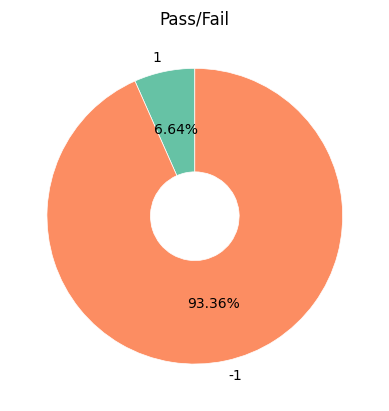

In [10]:
Y_data_count = pd.DataFrame(Y_data.value_counts(ascending=True))
# display(Y_data_count)

title = 'Pass/Fail'
plot_class_ratio(data=Y_data_count, title=title)

#### Train/Test Data 분리: 8:2

In [11]:
TRAIN_RATIO = 0.8
TEST_RATIO = 1 - TRAIN_RATIO
SPLIT_RANDOM_STATE = 42

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=TEST_RATIO, random_state=SPLIT_RANDOM_STATE)
print(f'Train: {X_train.shape}')
print(f'Test: {X_test.shape}')

Train: (1253, 51)
Test: (314, 51)


#### 클래스 비율 확인

In [12]:
Y_train_count = pd.DataFrame(Y_train.value_counts(ascending=True))
Y_test_count = pd.DataFrame(Y_test.value_counts(ascending=True))

display(Y_train_count)
# title = 'Train data - Pass/Fail'
# plot_class_ratio(data=Y_train_count, title=title)

display(Y_test_count)
# title = 'Test data - Pass/Fail'
# plot_class_ratio(data=Y_test_count, title=title)

,count
Pass_Fail,
1,80
-1,1173


,count
Pass_Fail,
1,24
-1,290


#### Data Scaling: StandardScaler

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

scaler = StandardScaler()
# scaler = MinMaxScaler()
# scaler = MaxAbsScaler()
# scaler = RobustScaler()

X_train_columns = X_train.columns
X_test_columns = X_test.columns

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train_columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test_columns)

#### Over Sampling: SMOTE

In [14]:
from imblearn.over_sampling import SMOTE

SMOTE_RANDOM_STATE = 0

smote = SMOTE(random_state=SMOTE_RANDOM_STATE)
X_smote, Y_smote = smote.fit_resample(X_train, Y_train)

print(f'Train SMOTE: {X_smote.shape}')

Train SMOTE: (2346, 51)


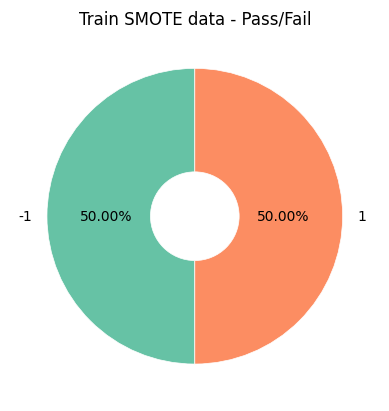

In [15]:
Y_smote_count = pd.DataFrame(Y_smote.value_counts(ascending=True))

title = 'Train SMOTE data - Pass/Fail'
plot_class_ratio(data=Y_smote_count, title=title)

### LightGBM

In [16]:
from lightgbm import LGBMClassifier

##### Params

In [17]:
N_ESTIMATIORS = 200
N_JOBS = 30
MODEL_RANDOM_STATE = 100
OBJECTIVE = 'binary'
MAX_BIN = 30
MAX_DEPTH = -1
NUM_LEAVES = 31
SUBSAMPLE = 1.0
COLSAMPLE_BYTREE = 1.0
LEARNING_RATE = 1e-2
REG_ALPHA = 0.0
REG_LAMBDA = 0.0
BOOSTING_TYPE = 'gbdt'
BOOST_FROM_AVERAGE = False

In [18]:
model = LGBMClassifier(n_estimators=N_ESTIMATIORS,
                       n_jobs=N_JOBS,
                       random_state=MODEL_RANDOM_STATE,
                       objective=OBJECTIVE,
                       max_bin=MAX_BIN,
                       max_depth=MAX_DEPTH,
                       num_leaves=NUM_LEAVES,
                       subsample=SUBSAMPLE,
                       colsample_bytree=COLSAMPLE_BYTREE,
                       learning_rate=LEARNING_RATE,
                       boost_from_average=BOOST_FROM_AVERAGE,
                       reg_alpha=REG_ALPHA,
                       reg_lambda=REG_LAMBDA,
                       boosting_type=BOOSTING_TYPE)

display(model)

/opt/homebrew/Caskroom/miniforge/base/envs/spe_env/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier(boost_from_average=False, learning_rate=0.01, max_bin=30,
               n_estimators=200, n_jobs=30, objective='binary',
               random_state=100)

#### Model Training

In [19]:
model.fit(X_smote, Y_smote)

[LightGBM] [Info] Number of positive: 1173, number of negative: 1173
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1518
[LightGBM] [Info] Number of data points in the train set: 2346, number of used features: 51


/opt/homebrew/Caskroom/miniforge/base/envs/spe_env/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier(boost_from_average=False, learning_rate=0.01, max_bin=30,
               n_estimators=200, n_jobs=30, objective='binary',
               random_state=100)

#### Prediction

In [20]:
Y_pred = model.predict(X_test)

In [21]:
df_predict = pd.DataFrame()
df_predict['original'] = Y_test
df_predict['prediction'] = Y_pred
count_prediction = df_predict['prediction'].value_counts(normalize=True).map(lambda n: '{:.2%}'.format(n))

# display(df_predict)
display(count_prediction)

prediction
-1    87.90%
 1    12.10%
Name: proportion, dtype: object

#### Model Evaluation

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

##### 모델 평가 함수

In [23]:
def get_classification_eval(y_test, y_pred=None):
    len_data = len(y_test)
    AVERAGE = 'macro'

    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=AVERAGE)
    recall = recall_score(y_test, y_pred, average=AVERAGE)
    f1 = f1_score(y_test, y_pred, average=AVERAGE)

    print(f'Test Dataset: {len_data}')
    print('\nConfusion:')
    print(confusion)
    
    print('\nAccuracy: {:.4f}'.format(accuracy))
    print('Precision: {:.4f}'.format(precision))
    print('Recall: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(f1))

In [24]:
get_classification_eval(Y_test, Y_pred)

Test Dataset: 314

Confusion:
[[264  26]
 [ 12  12]]

Accuracy: 0.8790
Precision: 0.6362
Recall: 0.7052
F1: 0.6600


##### Confusion Matrix

/opt/homebrew/Caskroom/miniforge/base/envs/spe_env/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


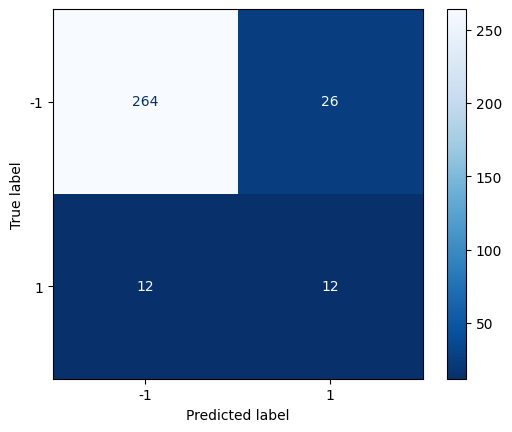

In [25]:
ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, cmap='Blues_r')

#### Feature Importance

In [26]:
feature_importance = model.feature_importances_
feature_names = X_smote.columns

df_feature_importance = pd.DataFrame()
df_feature_importance['feature'] = feature_names
df_feature_importance['importance'] = feature_importance

df_feature_importance = df_feature_importance.sort_values(by='importance', ascending=False)
# df_feature_importance.reset_index(inplace=True)
# fi_top20 = df_feature_importance[:20]

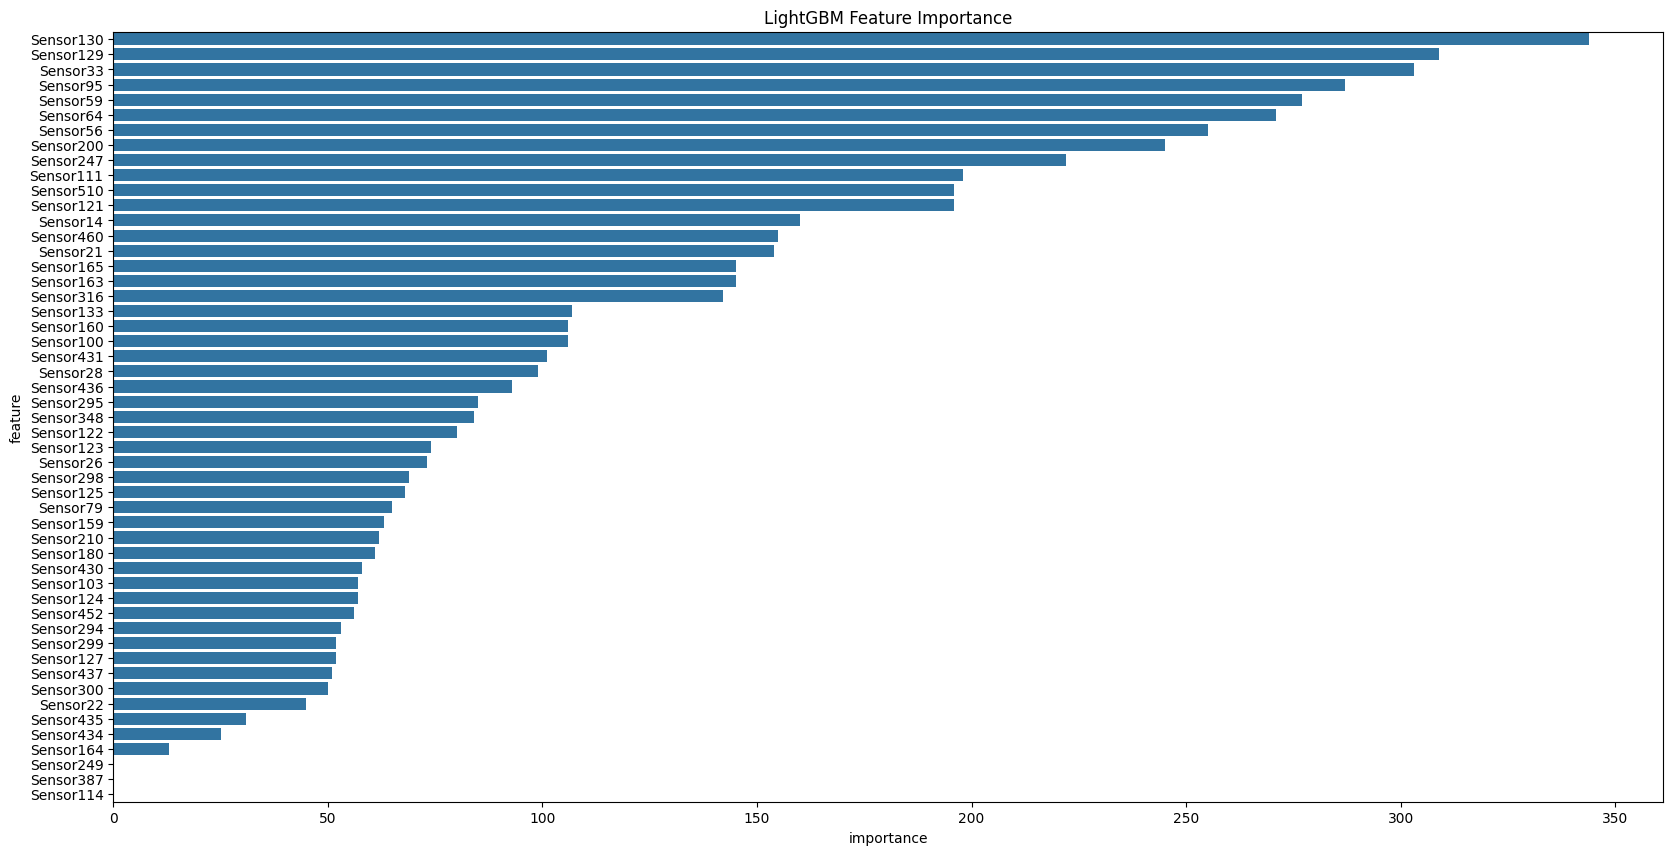

In [27]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df_feature_importance, x='importance', y='feature')
plt.title('LightGBM Feature Importance')
plt.show()